EDA Performance Students Indicator

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/stud.xlsx')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
list(df.columns)

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
df.duplicated().sum() #print 0 or 1

0

In [ ]:
[df.duplicated()] # print in true or false

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 995    False
 996    False
 997    False
 998    False
 999    False
 Length: 1000, dtype: bool]

In [ ]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#check number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
#check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
[ feature for feature in df.columns if df[feature].dtype!='O']

['math_score', 'reading_score', 'writing_score']

In [ ]:
#segrregate numerical data and categorical data
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [ ]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [ ]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [ ]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#Aggregate the total score with mean
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='avg_score', ylabel='Count'>

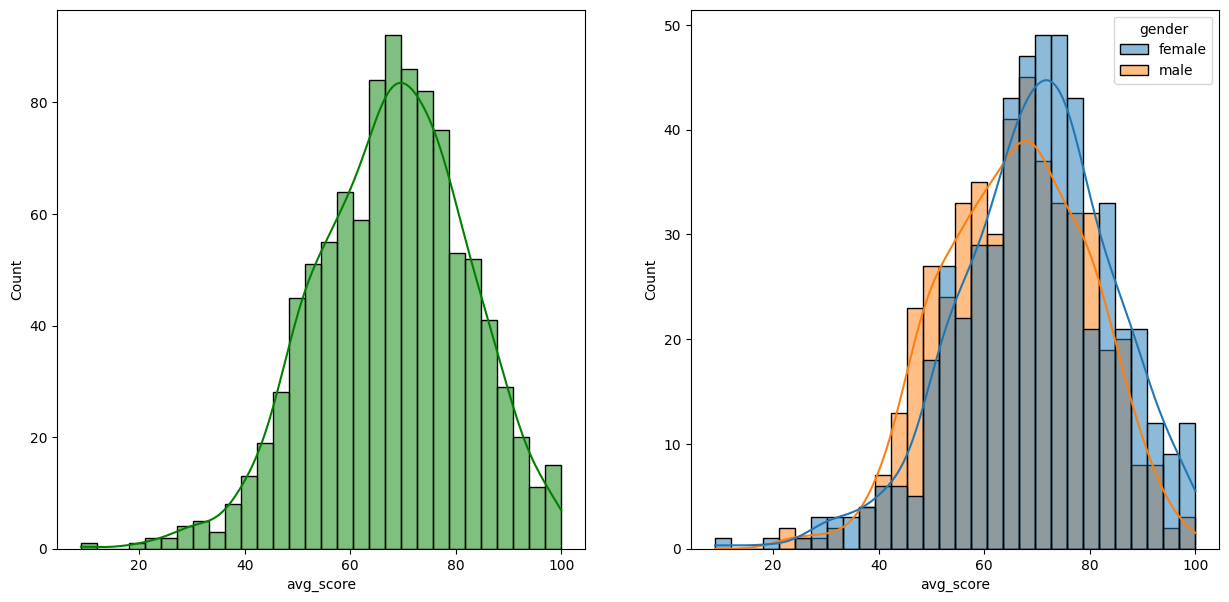

In [ ]:
#explore more visualization
fig,axis = plt.subplots(1,2,figsize = (15,7)) #1 row , 2 col
plt.subplot(121) #in 1,2 row 1 is a position where the box needs to been plot
sns.histplot(data = df, x = 'avg_score', bins = 30, kde=True,color='g')
plt.subplot(122) # 1 row 2 col and 2 is a position whre the diagram needs to bee drawn
sns.histplot(data = df, x = 'avg_score', bins=30,kde=True,hue='gender')

#Insights
  Female students tend to perform well than the male students

<Axes: xlabel='avg_score', ylabel='Count'>

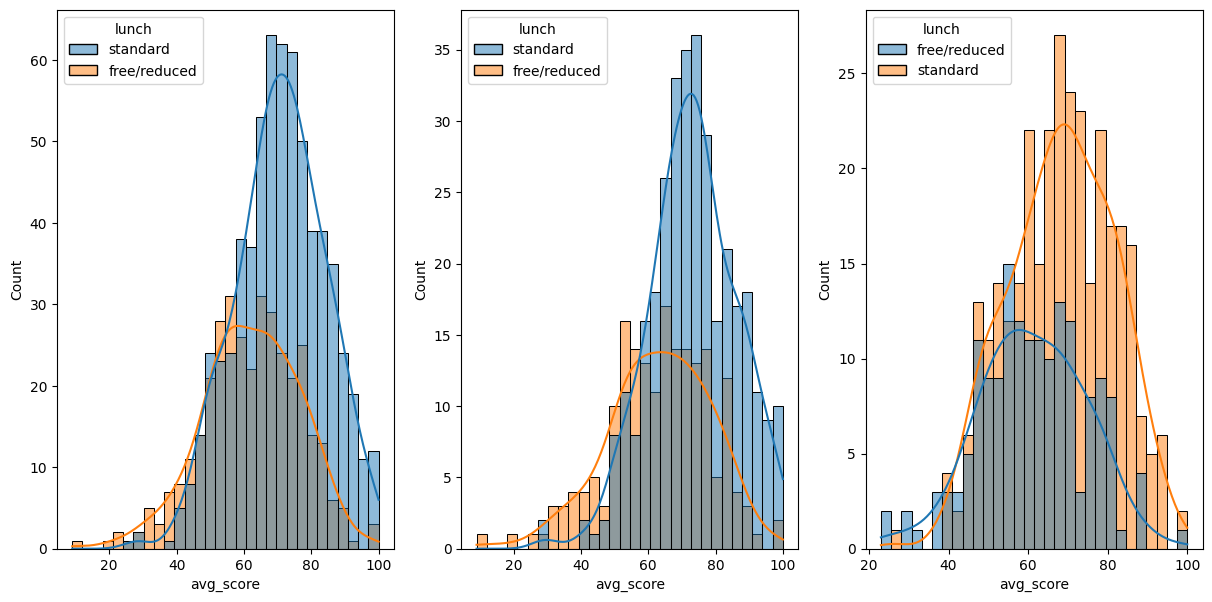

In [ ]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(141)
sns.histplot(data = df, x = 'avg_score', bins = 30, kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'avg_score', bins = 30, kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'avg_score', bins = 30, kde=True,hue='lunch')

Standard lunch help students to perform well in exams

Standard lunch help students to perform well in exams will be it male or female

> Add blockquote



In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='avg_score', ylabel='Count'>

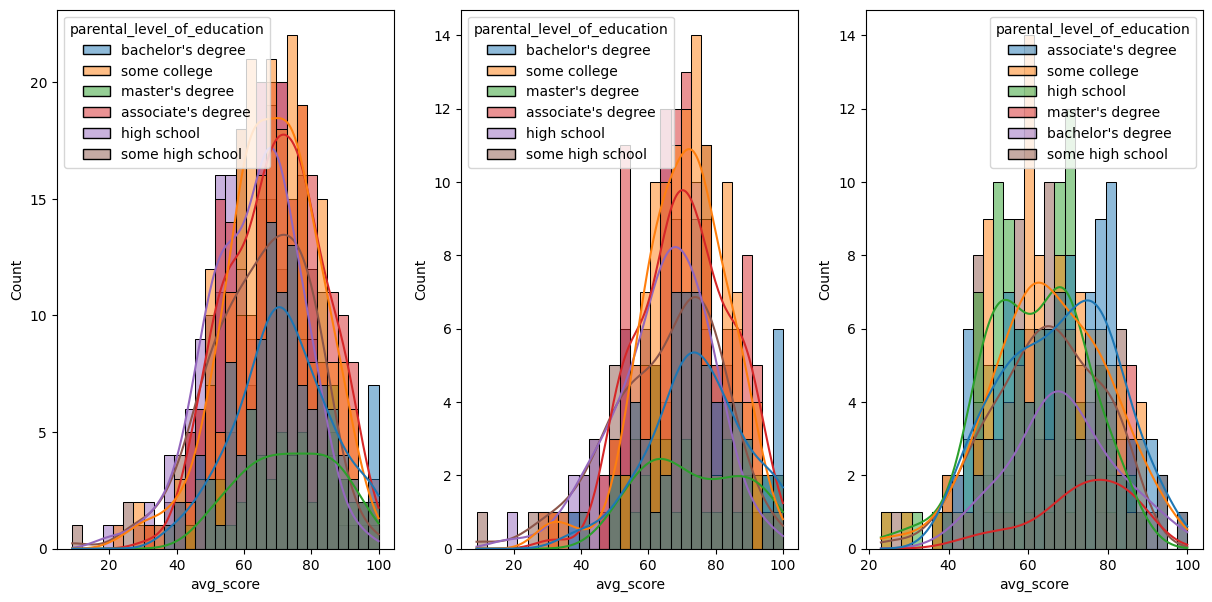

In [ ]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(141)
sns.histplot(data = df, x = 'avg_score', bins = 30, kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'avg_score', bins = 30, kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'avg_score', bins = 30, kde=True,hue='parental_level_of_education')

Insights
In general parent's education don't help student perform well in exam

2nd plot shows that parent's whose education is associate degree or master degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education female students

In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='avg_score', ylabel='Count'>

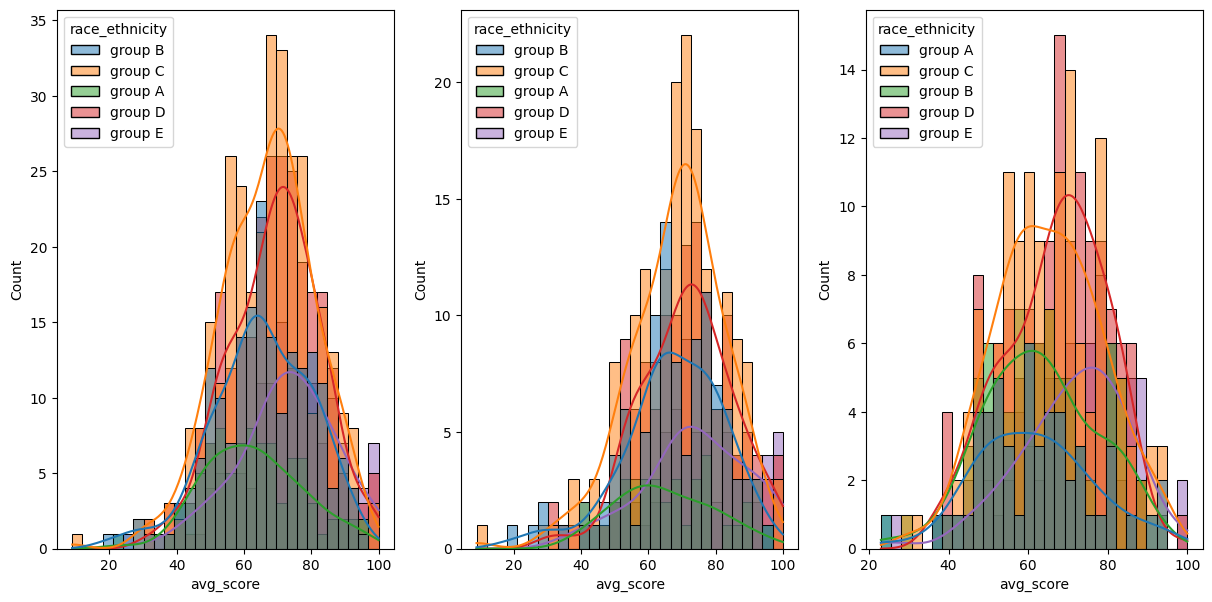

In [ ]:
plt.subplots(1,3,figsize = (20,7))
plt.subplot(141)
sns.histplot(data = df, x = 'avg_score', bins = 30, kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'avg_score', bins = 30, kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'avg_score', bins = 30, kde=True,hue='race_ethnicity')

Insights
1. In 1st plot, Group C has the highest average score or Group C perform well in the exam
2. 2nd plot, female from the Group A has the minimum average score and female from the Group C has the highest avg score
3. 3rd plot, male from the Group D perform well in the exam

